In [31]:
from Louvain_algo import Louvain_algo
import networkx as nx
import utils
import pickle
import csv

False

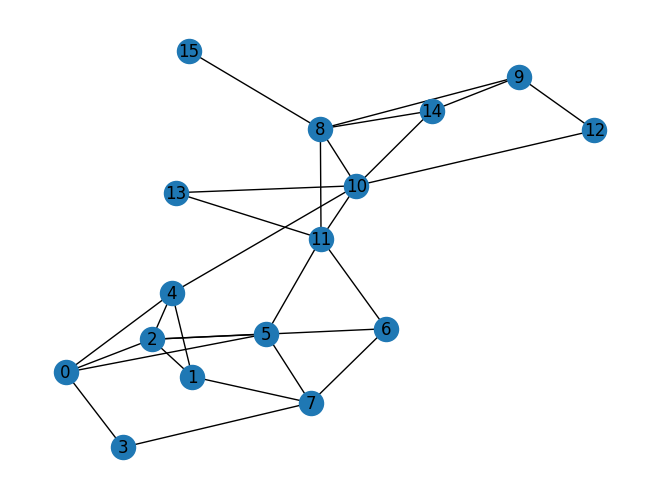

In [13]:
nodes = [(0,3),(1,7),(1,2),(1,4),(0,2),(0,4),(0,5),(2,4),(2,5),(2,6),(3,7),(5,7),(5,11),(6,7),(6,11),(8,11),(8,9),(8,10),(4,10),(8,14),(8,15),(9,14),(9,12),(10,11),(10,13),(10,12),(10,14),(11,13)]
G = nx.Graph()
G.add_edges_from(nodes)
nx.draw(G,with_labels=True)
G.has_edge(0,7)

In [14]:
len(G.edges)
algo = Louvain_algo(G,1)
communities = algo.run()


changes 10
changes 7
changes 0
before 0.34630102040816324
mod inside passage2 -0.09999999999999998
changes 2
len 2
mod change 0.0
Convergence reached. Stopping iterations.
after 0.39221938775510207
mod -0.09999999999999998
the number of communities is 2
what is better 4


In [15]:
#
nx.set_node_attributes(G, dict(G.degree()), 'total_degree')
#dict(G.degree())
G.nodes[0]['total_degree']

4

In [16]:
print(len(communities))
communities

4


{7: {3, 6, 7}, 4: {0, 1, 2, 4, 5}, 12: {8, 9, 10, 12, 14, 15}, 13: {11, 13}}

In [17]:
communities = nx.community.louvain_communities(G)
communities

[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]

In [18]:
communities = nx.community.louvain_communities(G,max_level=1)
print("after first passage",communities)
communities = nx.community.louvain_communities(G,max_level=2)
print("after second passage",communities)

after first passage [{0, 1, 2, 3, 4, 5, 7}, {11, 13, 6}, {8, 9, 10, 12, 14, 15}]
after second passage [{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]


In [19]:
#nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
#G = utils.Create_Graph(nodes=nodes , edges=edges)

In [20]:
def email():
    graph = nx.read_edgelist("data/email-Eu-core.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
email_graph = email()

In [21]:
algo = Louvain_algo(email_graph,1)
communities = algo.run()

changes 955
changes 191
changes 22
changes 4
changes 1
changes 0
before 0.41741731167558505
mod inside passage2 -0.0026035502958579827
changes 8
len 8
mod change 0.0
Convergence reached. Stopping iterations.
after 0.4202653633903607
mod -0.0026035502958579827
the number of communities is 8
what is better 16


In [11]:
print(len(communities))
print(nx.community.modularity(email_graph,list(communities.values())))

16
0.41741731167558505


In [12]:
communities = nx.community.louvain_communities(email_graph,seed = 123)
print(len(communities))
print(nx.community.modularity(email_graph,communities))

communities = nx.community.louvain_communities(email_graph,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=3,seed=123)
print("after second passage",len(communities))

8
0.4308321076069302
after first passage 20
after second passage 8
after second passage 8


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (2, 3), (3, 6), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 7), (5, 8), (6, 9), (7, 8), (8, 9)]


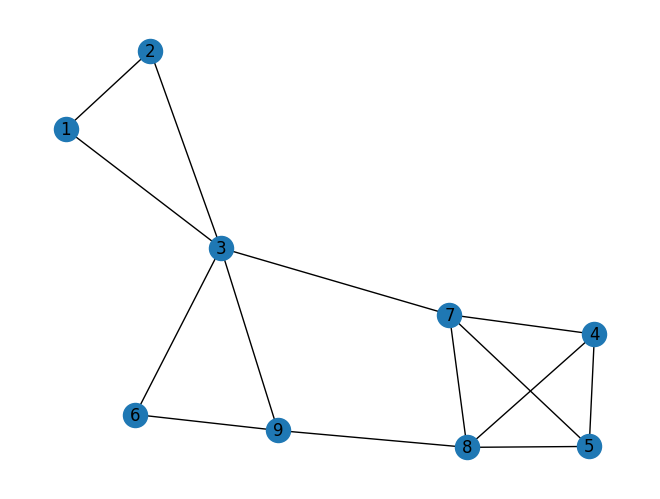

In [13]:
# Create a small graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

# Add edges
G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])

# Draw the graph
nx.draw(G, with_labels=True)
print(G.nodes)
print(G.edges)


changes 6
changes 0
before 0.32908163265306123
node 2 weight 9
node 5 weight 14
node 9 weight 5
node (2, 9) weight 2
node (2, 5) weight 1
node (5, 9) weight 1
mod inside passage2 -0.2222222222222222
changes 1
len 2
mod change 0.0
Convergence reached. Stopping iterations.
after 0.35714285714285715
mod -0.2222222222222222
the number of communities is 2
what is better 3
CPU times: user 34.3 ms, sys: 263 µs, total: 34.5 ms
Wall time: 31 ms


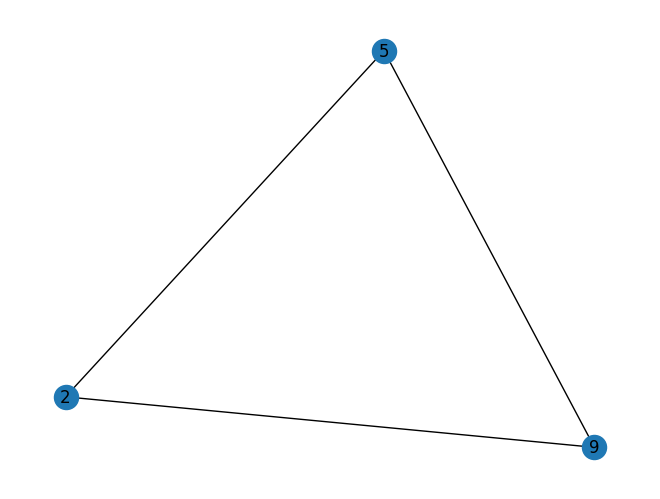

In [14]:
%%time
algo = Louvain_algo(G,1)
communities = algo.run()

In [15]:
communities

{2: {1, 2, 3}, 5: {4, 5, 7, 8}, 9: {6, 9}}

In [16]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))
list(communities.values())

{2: {1, 2, 3}, 5: {8, 4, 5, 7}, 9: {9, 6}}
There are 3 communities
0.32908163265306123


[{1, 2, 3}, {4, 5, 7, 8}, {6, 9}]

In [17]:
%%time
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
print(communities_built)

There are 2 communities.
0.35714285714285715
[{1, 2, 3, 6, 9}, {8, 4, 5, 7}]
CPU times: user 847 µs, sys: 0 ns, total: 847 µs
Wall time: 843 µs


In [18]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)
print("Is connected",nx.is_connected(graph))


The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496
Is connected False


In [19]:
s = list(nx.connected_components(graph))
G = graph.subgraph(s[0])
N = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  4158
The number of edges in the graph is: 13428


In [20]:
algo = Louvain_algo(G,1)

changes 3144
changes 776
changes 169
changes 27
changes 5
changes 0
before 0.6864614010853589
node 5233 weight 16
node 19607 weight 44
node 14982 weight 12
node 3386 weight 35
node 10427 weight 11
node 10268 weight 20
node 18600 weight 31
node 20421 weight 12
node 5407 weight 134
node 12141 weight 13
node 14265 weight 49
node 3937 weight 6
node 7504 weight 18
node 7601 weight 4
node 9522 weight 7
node 19525 weight 9
node 14004 weight 4
node 16083 weight 91
node 6825 weight 8
node 10351 weight 41
node 2959 weight 31
node 5794 weight 43
node 14007 weight 7
node 15301 weight 4
node 21543 weight 12
node 22184 weight 70
node 23647 weight 14
node 26023 weight 12
node 26051 weight 3
node 23559 weight 14
node 22415 weight 20
node 25850 weight 12
node 12928 weight 211
node 2952 weight 3295
node 22798 weight 9
node 22497 weight 29
node 24924 weight 26
node 16393 weight 153
node 8824 weight 10
node 12306 weight 15
node 21707 weight 6
node 14969 weight 50
node 18109 weight 6
node 25379 weight 5
no

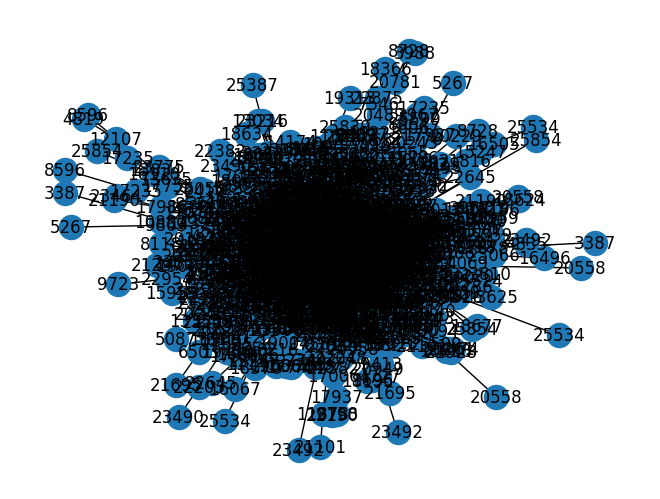

In [21]:
%%time
communities = algo.run()

In [22]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))



{25854: {21696, 16835, 25940, 18677, 6427, 284, 25854}, 8968: {23552, 9217, 16389, 7689, 16393, 8715, 25610, 25615, 23063, 18457, 19997, 16414, 7715, 20515, 20517, 8742, 9255, 13864, 20519, 8231, 10794, 15917, 6190, 3630, 20526, 11821, 16429, 21549, 23092, 9269, 10807, 9273, 8768, 10819, 23110, 80, 22621, 5216, 20065, 21608, 13929, 13931, 16495, 20478, 14970, 14972, 16006, 16521, 20106, 11403, 16011, 16013, 16010, 25236, 21142, 8864, 20129, 9893, 22693, 9895, 22696, 22184, 8871, 10923, 11944, 21165, 22189, 11951, 21167, 22188, 9907, 20148, 20149, 25783, 25784, 19131, 20155, 17086, 193, 17090, 20169, 17099, 24270, 9937, 7383, 9944, 10967, 9943, 15580, 24060, 17131, 19179, 17135, 17137, 1265, 11002, 21754, 9980, 25850, 15614, 23806, 9984, 23810, 16131, 17158, 8968, 15625, 17162, 9993, 14093, 17172, 7446, 22806, 15126, 16155, 22811, 2342, 9517, 1839, 10543, 15669, 25910, 23864, 8505, 1339, 11583, 5444, 3909, 1350, 3910, 11077, 16210, 25435, 21341, 4446, 7522, 12130, 23910, 18790, 23912, 5

In [23]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
communities = nx.community.louvain_communities(G,seed = 123)
print(len(communities))
print(nx.community.modularity(G,communities))

communities = nx.community.louvain_communities(G,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=3,seed=123)
print("after third passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=4,seed=123)
print("after forth passage",len(communities))

There are 42 communities.
0.8487853033009867
43
0.8477628597902169
after first passage 868
after second passage 201
after third passage 55
after forth passage 43


Get the communities for the facebook graph and store it on the graph and csv file.

In [22]:
nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [23]:
algo = Louvain_algo(G,1)

In [24]:
communities = algo.run()

changes 18815
changes 7442
changes 2084
changes 797
changes 390
changes 283
changes 163
changes 94
changes 117
changes 67
changes 18
changes 3
changes 2
changes 0
before 0.7378181354915856
mod inside passage2 0.21131430160664685
changes 1584
len 257
mod change 0.07718576231998867
mod inside passage2 0.2885000639266355
changes 489
len 229
mod change 0.010750240876355899
mod inside passage2 0.2992503048029914
changes 96
len 223
mod change 0.0017098570400602142
mod inside passage2 0.30096016184305163
changes 19
len 222
mod change 0.00017544530073043685
mod inside passage2 0.30113560714378207
changes 3
len 221
mod change 0.00011142284209664233
mod inside passage2 0.3012470299858787
changes 1
len 221
mod change 0.0
Convergence reached. Stopping iterations.
after 0.8089016882361988
mod 0.3012470299858787
the number of communities is 221
before 0.3012470299858787
mod inside passage2 0.07865878042647956
changes 164
len 66
mod change 0.017265597873588626
mod inside passage2 0.09592437830006818


In [27]:
len(communities)

66

In [28]:
nx.community.modularity(G,list(communities.values()))
print(nx.community.modularity(G,list(communities.values())))
print("There are",len(communities),"communities.")

0.8147619433604344
There are 66 communities.


In [26]:
#Adding the community id to the graphs as attributes
def add_community_ids(G,node_lists,attribute):
    for i, nodes in enumerate(node_lists):
        for node in nodes:
            # Here you can set any attribute
            G.nodes[node][attribute] = i
    return G

In [28]:
added_G = add_community_ids(G,list(communities.values()),'Louvain_id')

In [40]:
def write_csv(G,csv_file_path):
    # Open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(['id','page_name','page_type','degree_centerality','betweenness_centerality','closeness_centrality','community_id','Louvain_id'])  # Add headers for node attributes if applicable
        
        # Write node information
        for node in G.nodes():
            # Get node attributes if available
            # For example, you might have node attributes stored as a dictionary
            node_attributes = G.nodes[node]
            
            # Write node information to CSV
            writer.writerow([node] + [node_attributes.get(attribute, '') for attribute in ['page_name','page_type','degree_centerality','betweenness_centerality','closeness_centrality','community_id','Louvain_id']])


In [42]:
write_csv(added_G,'nodes_with_Louvain_communities')

In [36]:
import pickle
#In case of storeing the comunities 
with open('data/com0_', 'wb') as file:
    pickle.dump(communities, file)


In [19]:
G.number_of_nodes()

22470

In [13]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
nx.community.modularity(G,communities_built)

There are 63 communities.


0.8158254936882471

0.8145420188092388

In [24]:
communities_built

[{44,
  79,
  101,
  263,
  282,
  410,
  568,
  584,
  717,
  787,
  828,
  839,
  991,
  1126,
  1305,
  1394,
  1517,
  1523,
  1558,
  1618,
  1753,
  2052,
  2160,
  2432,
  2532,
  2864,
  2872,
  2971,
  3074,
  3103,
  3241,
  3372,
  3639,
  3852,
  3885,
  3981,
  4031,
  4077,
  4118,
  4278,
  4348,
  4401,
  4527,
  4751,
  4917,
  5010,
  5082,
  5165,
  5229,
  5317,
  5525,
  5589,
  5858,
  6147,
  6398,
  6635,
  6706,
  6745,
  6783,
  6836,
  7154,
  7228,
  7288,
  7355,
  7552,
  7554,
  7606,
  7800,
  7919,
  7978,
  8062,
  8641,
  8795,
  9034,
  9194,
  9288,
  9567,
  9641,
  9813,
  9996,
  9999,
  10625,
  10974,
  11137,
  11173,
  11248,
  11264,
  11286,
  11329,
  11349,
  11375,
  11473,
  11850,
  12025,
  12514,
  12745,
  12774,
  12870,
  13074,
  13140,
  13328,
  13383,
  13408,
  13675,
  13922,
  14016,
  14053,
  14127,
  14236,
  14703,
  14831,
  14935,
  14984,
  15332,
  15389,
  15416,
  15490,
  15880,
  15908,
  15930,
  16103,
  16105

In [13]:
G.subgraph([3466]).subgraph([937,5233,1031]).number_of_edges()

0

In [11]:
G.nodes()
G[3466]

AtlasView(FilterAtlas({937: {}, 5233: {}, 8579: {}, 10310: {}, 15931: {}, 17038: {}, 18720: {}, 19607: {}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7e6435f10b80>))

In [10]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    if com_inv[n] not in gains.values():
        gains[1]=com_inv[n]
print(gains)


{1: 1}
CPU times: user 104 µs, sys: 74 µs, total: 178 µs
Wall time: 189 µs


In [11]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    gains[1]=com_inv[n]
print(gains)

{1: 1}
CPU times: user 135 µs, sys: 96 µs, total: 231 µs
Wall time: 246 µs


In [5]:
print("j")

j
